# Linear Regression

### Normal Equation 
* This equation used to find weights of different features<br>
<img src='https://media.geeksforgeeks.org/wp-content/uploads/Untitled-drawing-1-10.png'><br>
* θ: hypothesis parameters that define it the best. 
<br>X: Input feature value of each instance. 
<br>Y: Output value of each instance. 

In [1]:
import numpy as np 

#genrating random linear data
x = np.random.rand(100,1)
y = (3 * x ) + 4 + np.random.rand(100,1)

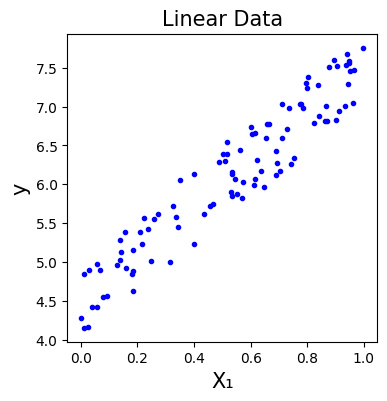

In [2]:
import matplotlib.pyplot as plt 

plt.figure(figsize=(4,4))
plt.plot(x,y,'b.')
plt.xlabel('X₁',fontsize=15)
plt.ylabel('y',fontsize=15)
plt.title('Linear Data',fontsize=15)
plt.show()

In [3]:
#finding transpose , inverse of X matrix
X = np.c_[np.ones((100,1)),x] #add x0=1 to each instance
X_trans = X.T
X_inv = np.linalg.inv(X_trans.dot(X))
theta_best = X_inv.dot(X_trans).dot(y) # Normal Equation
theta_best

array([[4.51833823],
       [3.01839698]])

In [4]:
# predicting with new data
x_new = np.array([[0],[0.99]])
X_new = np.c_[(np.ones((2,1)),x_new)]
y_predicted = X_new.dot(theta_best)
y_predicted

array([[4.51833823],
       [7.50655124]])

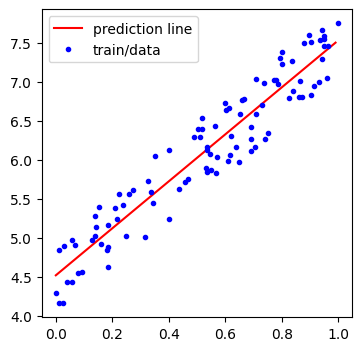

In [5]:
# visualising results
plt.figure(figsize=(4,4))
plt.plot(x_new,y_predicted,'r-',label='prediction line')
plt.plot(x,y,'b.',label='train/data')
plt.legend()
plt.show()

* We can do same thing with scikit-learn's linear_regressor model and it perform better then the equation as it uses SVD (Singular value Decomposition) to find the pseudoinverse of matrix
* another benefit is that in Normal eq we had to find inverse of it which is not possible in singular matrix but pseudoinverse is defined for every matrix<br>
<b>Note : Study SVD from Notebook</b>

# Gradient decent
* Its is a optimizing algorithim capable to find optimal solution to a wide range of problems
* The main idea is to tweak parameter iteratively to minimize a cost function<br>
<img src = 'https://149695847.v2.pressablecdn.com/wp-content/uploads/2022/07/image-99.png' height = '200'  width = '200'>

### Batch Gradient Decent
* we find the partial derevative of the loss function with all the parameter then minimize the loss (read the gradiant decent step )
* In this we calculate over whole data set which turn out to be a long process with big datasets 

In [6]:
#performing gradient decent
learning_rate = 0.1
n_itter = 1000
m = len(X)

theta = np.random.randn(2,1)  #creating a random initial theta

for i in range(n_itter):
    theta_new = (2/m) * ( X.T.dot( X.dot(theta) - y ) ) # this formula is the derivative of MSE with respect to theta
    theta = theta - (theta_new * learning_rate)
theta_gd = theta
theta_gd

array([[4.51833871],
       [3.01839613]])

### Stochastic Gradient Decent
* The formula is quite similar to gradient decent but it differ in learning rate selection and data used
* By convention we use single instance and determine learning rate at each at each itteration called <i>learning_schedule</i>
* by convention we iterate <i>m</i> (ie. length of X) times in each round called epoch 

In [7]:
# performing SGD 
n_epoch = 50
t0 , t1 = 5 ,50 #learning schedule hyperparameter

def learning_schedule(t):
    return t0 / (t0 + t)

for epoch in range (n_epoch):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index : random_index+1] #select random instance
        yi = y[random_index : random_index+1]
        theta_new = (2/m) * ( xi.T.dot( xi.dot(theta) - yi ) )
        learning_rate = learning_schedule(epoch * m + 1)
        theta = theta -(theta_new * learning_rate)
theta_SGD = theta
theta_SGD

array([[4.50482593],
       [3.00501065]])

In [8]:
# we can do same with scikit learn using SGDRegressor in linear_model
from sklearn.linear_model import SGDRegressor

sgd = SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1)
sgd.fit(x,y.ravel())

sgd.intercept_,sgd.coef_
#see we are getting very much same results

(array([4.57490037]), array([2.93879797]))

### Conclusion
<img src='https://i.ibb.co/m5GrF0k/conclusion.jpg'>

# Polynomial Regrssion
* We can use linear model to fit non-linear data by adding power to each feature this technique is called polynomial regression

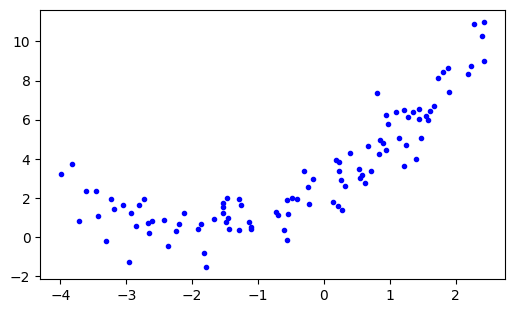

In [9]:
# creating non linear data ie. quadritic in this case
x = 6.5* np.random.rand(100,1) - 4
y = (0.5*(x**2)) + 2*(x) + 2.5  +np.random.randn(100,1)  # aX² + bX + c

plt.figure(figsize=(6,3.5))
plt.plot(x,y,'b.')
plt.show()

#look very much like a quadritic's graph

* Clearly a straight line will never fit data so we will transform our feature from linear to 2nd degree polynomial with sklearn's PolynomialFeatures class 
* then we can fit it with a linear regressor

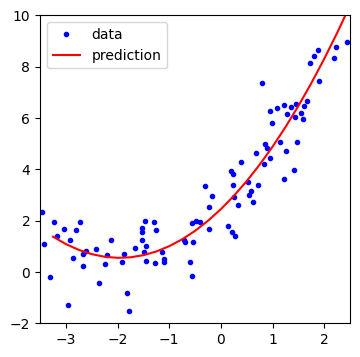

In [10]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_feature = PolynomialFeatures(degree=2,include_bias=False)
x_poly = poly_feature.fit_transform(x)

lin_reg = LinearRegression()
lin_reg.fit(x_poly,y)

intercept = lin_reg.intercept_ # this will give the constant of eq.
coff      = lin_reg.coef_ # this will give the coff of X , X² respectivly 

#plotting results
x_pred = [-3.25, -3.0, -2.75, -2.5, -2.25, -2.0, -1.75, -1.5, -1.25, -1.0, -0.75, -0.5, -0.25,
          0.0, 0.25, 0.5, 0.75, 1.0, 1.25, 1.5, 1.75, 2.0, 2.25, 2.5, 2.75]
y_pred = [(coff[0][1] * (i**2) + coff[0][0]*i + intercept) for i in x_pred]

plt.figure(figsize=(4,4))
plt.plot(x,y,'b.',label='data')
plt.plot(x_pred,y_pred,'r-',label='prediction')
plt.xlim(-3.5,2.5)
plt.ylim(-2,10)
plt.legend()
plt.show()

* we can make any degree of feature but a big number might end up overfitting on the other hand a smaller one will underfit hence a optimal number is desired as in above we know the data is gerated with a quad. eq. so we used a 2nd deg. data which fit it goodly 

# Leraning Curves
* These are the plot of performance of model on training and validation set as the function of training set size

In [11]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

#this function will plot the learning curve of model
def plot_learning_curve(model,x,y):
    x_train , x_val , y_train , y_val = train_test_split(x,y,test_size=0.2,random_state=42)
    train_error , val_error = [] , []
    for m in range(1,len(x_train)): #this loop will find train and val error at different train size
        model.fit(x_train[:m],y_train[:m])
        
        y_train_predict = model.predict(x_train[:m])
        y_val_predict = model.predict(x_val)
        
        train_err = mean_squared_error(y_train[:m] , y_train_predict)
        val_err = mean_squared_error(y_val , y_val_predict)
        
        train_error.append(train_err)
        val_error.append(val_err)
    
    #plotting result
    plt.figure(figsize=(5,4))
    plt.plot(np.sqrt(train_error),'b-',label='Train Error')
    plt.plot(np.sqrt(val_error),'r-',label='Validation Error')
    plt.xlabel('Train_set_size')
    plt.ylabel('RMSE')
    plt.legend()
    plt.show()

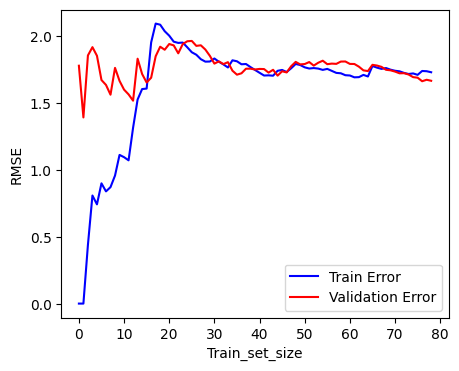

In [12]:
lin_model = LinearRegression()
plot_learning_curve(lin_model,x,y) # x and y are from polynomail regressor model
#clearly the model is underfitting as we are using a linear model over a quadritic data

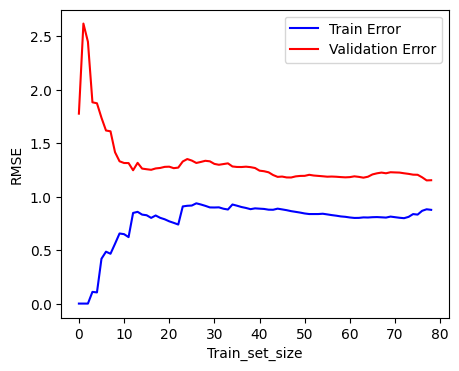

In [13]:
from sklearn.pipeline import Pipeline

poly_regressor = Pipeline([
    ('polynomial_feature',PolynomialFeatures(degree=2,include_bias=False)),
    ('lin_reg',LinearRegression())
])

plot_learning_curve(poly_regressor,x,y)
#now RMSE is quite low and get constant after certain training-set-size

# Regularizing Linear Models
* To reduce overfitting we have to regularize the model ie. to constrain it
* to regularize linear model we use Ridge regressor , lasso regressor and elastic net to contrain the weights

### Ridge Regression
* Its the regualrized version of linear regression with an regularization term added to cost function<br>
<img src='https://i.ibb.co/d0MtJ3G/ridge-reg.png'><br>
* It not only fit the data but also keep model weight as small as possible

In [14]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor

ridge_reg = Ridge(alpha=1,solver='cholesky')
ridge_reg.fit(x,y)

sgd_reg = SGDRegressor(penalty='l2')
# penalty='l2' indicates to add regularization term to cost function equal to half of square of weight (ie. simply ridge regression) 
sgd_reg.fit(x,y)

print('Ridge Regression Prediction',ridge_reg.predict([[1.5]]))
print('Stochastic Gradient Decent Prediction',sgd_reg.predict([[1.5]]))

Ridge Regression Prediction [[5.71551251]]
Stochastic Gradient Decent Prediction [5.69466242]


/home/ashish/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### LASSO Regression
* LASSO is short form for <b>least absolute shrinkage and selection opration</b> it uses l1 norm unlike l2 norm used in ridge regression<br>
<img src='https://i.ibb.co/4KXqLGC/lasso-reg.png'><br>
* it also a type of regularized linear regression but what makes it different is that it completely eliminates the weight of least important feature (ie set them to zero)

In [15]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1) 
lasso.fit(x,y)
lasso.predict([[1.5]])
#we will find similar result with SGDRegressor with penalty = l1

array([5.66116272])

### Elastic Net
* it is the middleground between ridge and lasso regression 
* Its regularization term is simple mix of both ridge and lasso and can be controlled by r
* At r = 0 its equivalent to ridge and at r = 1 lasso<br>
<img src='https://i.ibb.co/jMhZ5Rz/elastic-net.png'>

In [16]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5) # li_ratio corresponds to r
elastic_net.fit(x,y)
elastic_net.predict([[1.5]])

array([5.65365005])

### Early Stopping 
* A very unique way to regularize iterative learning algorithims such as Gradient Decent is to stop training as soon as error reaches minimum 
* Its dificult to tell the error reached minimum or not for SGD and mini-batch GD so we can stop when error has been above minimum for sometime 

# Logistic Regression
* It is commonly used to estimate the probability of instances belonging to a perticular class (generally used for binary classification)<br>
<div><img src='https://i.ibb.co/N9pJ4Jn/prob.png' style="width:25%"></div><div><img src='https://i.ibb.co/M1d482D/sigmoid.png' style="width:25%"></div><br>
* if p̂ >= 0.50 then ŷ = 1 or if p̂ < 0.50 then ŷ = 0
* Logistic Regression Loss function (log-loss)<br>
<img src='https://i.ibb.co/Xyjjm41/log-loss.png' style='width:50%'><br>

#### ilustration with iris(flower) dataset
this model will classify wether the flower is iris-virginica or not on the basis of petal width

In [17]:
#loading data
from sklearn.datasets import load_iris
iris = load_iris()
x = iris['data'][:,3:] #loading only flowers petal width
y = (iris['target'] == 2).astype(np.int64) # 1 if iris-virginica , else 0

In [18]:
#training
from sklearn.linear_model import LogisticRegression
lg_reg = LogisticRegression()
lg_reg.fit(x,y)
print('trained')

trained


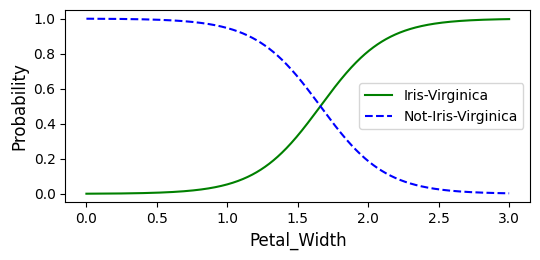

In [19]:
#predicting
x_new = np.linspace(0,3,1000).reshape(-1,1)
y_prob = lg_reg.predict_proba(x_new)

#plotting result
plt.figure(figsize=(6,2.5))
plt.plot(x_new,y_prob[:,1],'g-',label='Iris-Virginica')
plt.plot(x_new,y_prob[:,0],'b--',label='Not-Iris-Virginica')
plt.ylabel('Probability',fontsize=12)
plt.xlabel('Petal_Width',fontsize=12)
plt.legend()
plt.show()

### SoftMax Regression { Multinomial Logistic Regression}
* When a instance(x) is given softmax regression compute a score{sₖ(x)} for each class then estimate the probability of x lying in class by softmax function.
* Softmax score is equivalent to the Linear regression prediction for x but with theta(θ) different for different classes<br>
<img src='https://i.ibb.co/rp5vxH4/softmax-score.png' width='25%'><br>
* Softmax function (also known as <i>normalized exponential</i>) is the ratio of the exp of that score and sum of exp of all score (see image)<br>
<img src='https://i.ibb.co/WnN2LRQ/softmax-function.png' width='32%'><br>
* And at last just like Logistic Regression Softmax too predict the class with the highest estimated probability or highest score<br>
<img src='https://i.ibb.co/7GkMQYs/softmax-prediction.png' width='55%'><br>

In [20]:
x = iris['data'][:,(2,3)] # petals width and length
y = iris['target']

#this will change Logistic to softmax regression with solver lbfgs and regulerization(c=10)
softmax_reg = LogisticRegression(multi_class='multinomial',solver='lbfgs',C=10)
softmax_reg.fit(x,y)

print(softmax_reg.predict([[5,2]]),softmax_reg.predict_proba([[5,2]]))

[2] [[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


# End
If you made it to the end , an upvote will be appritiated